In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[15,10]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import shapiro
import statsmodels.stats.api as ssa
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sma
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
df = pd.read_excel("kanish.xlsx")
df.head()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,193,3,15,1.949
1,193,3,15,1.777
2,193,3,15,1.583
3,213,4,25,1.692
4,213,4,25,1.528


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   water pressure (Mpa)    27 non-null     int64  
 1   SOD(mm)                 27 non-null     int64  
 2   Traverse rate (mm/min)  27 non-null     int64  
 3   Ra(output)              27 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 992.0 bytes


In [4]:
df.corr()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
water pressure (Mpa),1.000000e+00,3.430376e-16,3.619750e-16,0.169651
SOD(mm),3.430376e-16,1.000000e+00,-5.518852e-17,0.071034
Traverse rate (mm/min),3.619750e-16,-5.518852e-17,1.000000e+00,-0.044014
Ra(output),1.696506e-01,7.103445e-02,-4.401351e-02,1.000000


In [5]:
df.describe()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,27.000000,27.00000,27.000000,27.000000
mean,213.333333,4.00000,25.000000,1.643444
std,17.058722,0.83205,8.320503,0.165939
min,193.000000,3.00000,15.000000,1.468000
25%,193.000000,3.00000,15.000000,1.525000
50%,213.000000,4.00000,25.000000,1.583000
75%,234.000000,5.00000,35.000000,1.734500
max,234.000000,5.00000,35.000000,2.035000


In [6]:
cols = ['water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)']

In [7]:
for i in cols:
    print(df[i].value_counts())

193    9
213    9
234    9
Name: water pressure (Mpa), dtype: int64
3    9
4    9
5    9
Name: SOD(mm), dtype: int64
15    9
25    9
35    9
Name: Traverse rate (mm/min), dtype: int64


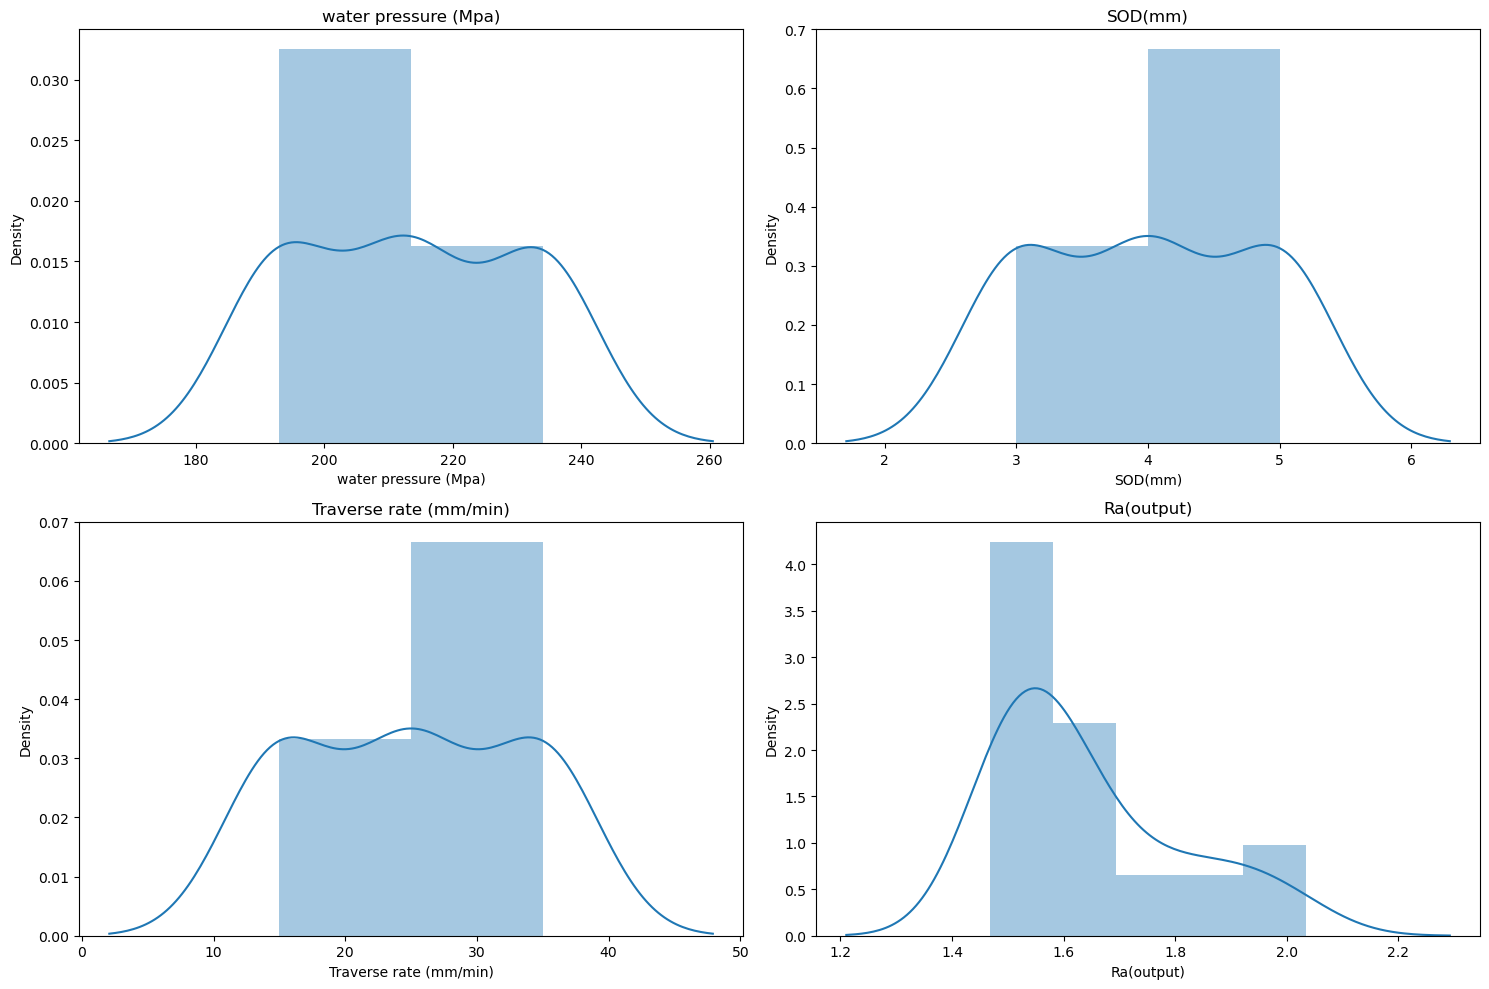

In [8]:
num_cols = df.select_dtypes(exclude='object')
num = num_cols.columns

nrows= 2
ncol = 2
iterator = 1
for i in num:
    plt.subplot(nrows,ncol,iterator)
    sns.distplot(df.loc[:,i],kde=True)
    iterator +=1
    plt.title(i)
plt.tight_layout()
plt.show()

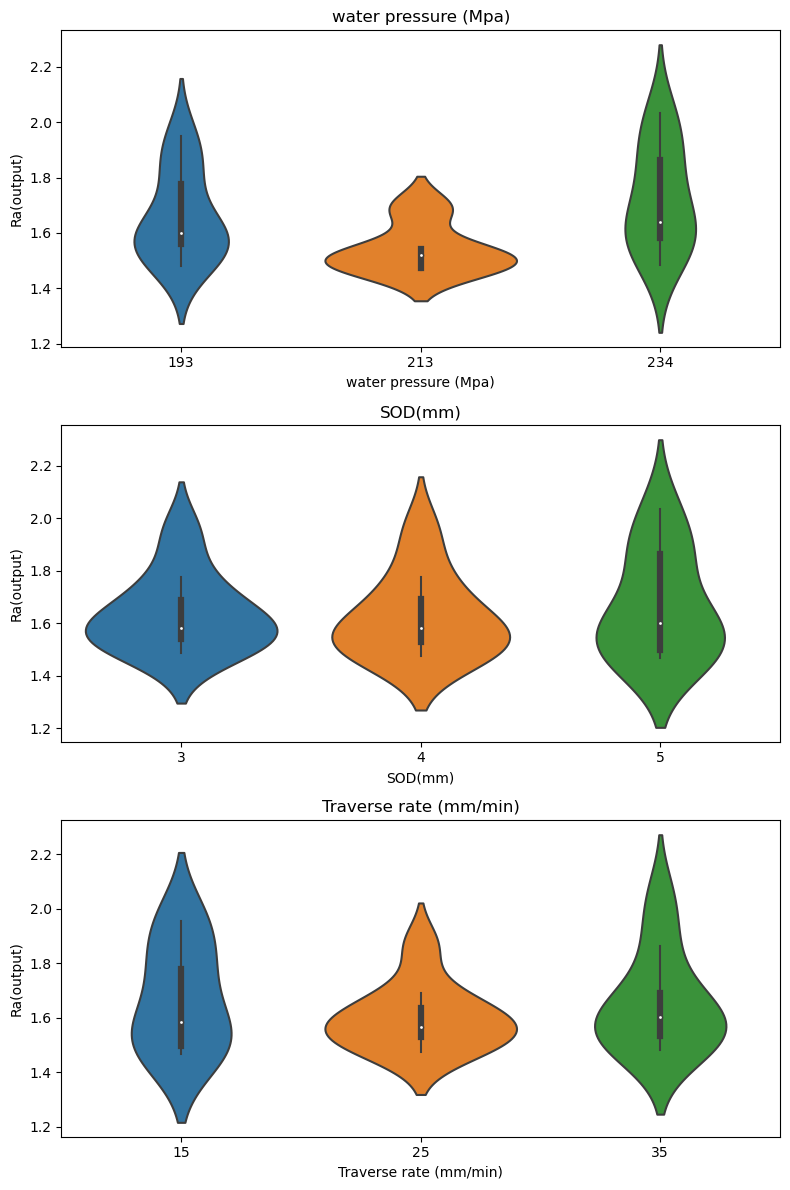

In [9]:
plt.rcParams["figure.figsize"]=[8,12]
cols = ["water pressure (Mpa)",'SOD(mm)', 'Traverse rate (mm/min)']
nrows= 3
ncol = 1
iterator = 1
for i in cols:
    plt.subplot(nrows,ncol,iterator)
    sns.violinplot(x=df[i],y=df['Ra(output)'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

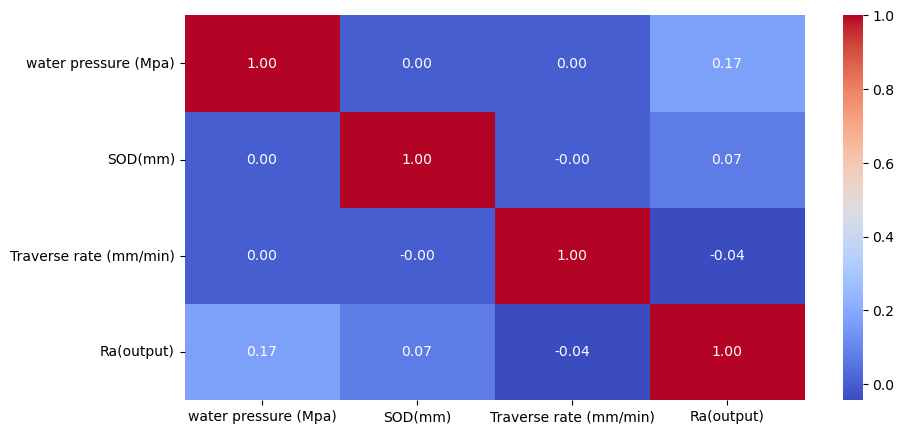

In [10]:
plt.rcParams["figure.figsize"]=[10,5]
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

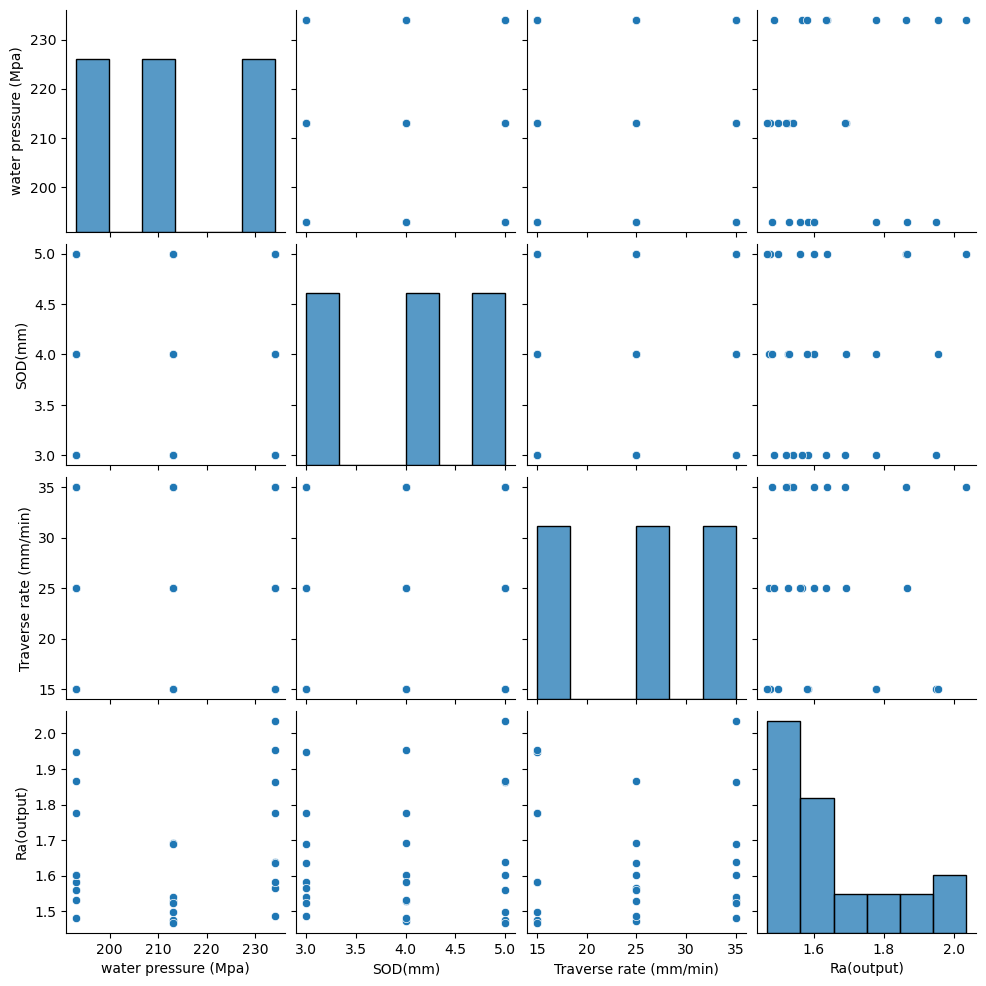

In [11]:
sns.pairplot(df,palette="bright")
plt.show()

In [12]:
df1 = df.copy(deep=True)

#### Feature engineering

In [13]:
# because the water pressure has the highest coorelation with the target

In [14]:
df1['Mean_Targ_Traverse_rate'] = df1.groupby('Traverse rate (mm/min)')['Ra(output)'].transform('mean')

#### Scaling the data
* using the standard scaler transformation

In [15]:
ss = StandardScaler()

In [16]:
df1[["water pressure (Mpa)",'SOD(mm)', 'Traverse rate (mm/min)']] = ss.fit_transform(df1[["water pressure (Mpa)",'SOD(mm)', 'Traverse rate (mm/min)']])

**Statistical test** 

* Ho: that the predictor is independent of target ( the predictor and target are not related)
* H1: that the predictor dependent of target

In [17]:
cols

['water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)']

In [18]:
for i in cols:    
    teststats,pvalue = stats.ttest_ind(df1[i], df1['Ra(output)'])
    print(i,'=',pvalue,'/',(pvalue<0.05))

water pressure (Mpa) = 4.759823274056221e-11 / True
SOD(mm) = 4.759823274056221e-11 / True
Traverse rate (mm/min) = 4.759823274056221e-11 / True


p value is < 0.05 for all the independent varialbles, 
hence we conclude that the target variable is dependent on all the features

In [19]:
df1.skew()

water pressure (Mpa)       0.031647
SOD(mm)                    0.000000
Traverse rate (mm/min)     0.000000
Ra(output)                 1.010708
Mean_Targ_Traverse_rate   -0.571611
dtype: float64

In [20]:
# there is no skewness in the data

In [21]:
# model builiding

In [22]:
x = df1.drop(columns=['Ra(output)'],axis=1)
y = df1['Ra(output)']

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(21, 4)
(6, 4)
(21,)
(6,)


In [24]:
temp_train = sma.add_constant(xtrain)
temp_test = sma.add_constant(xtest)

In [25]:
model = sma.OLS(ytrain,temp_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ra(output)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                 -0.126
Method:                 Least Squares   F-statistic:                    0.4410
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.777
Time:                        11:30:20   Log-Likelihood:                 9.7387
No. Observations:                  21   AIC:                            -9.477
Df Residuals:                      16   BIC:                            -4.255
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.3252      2.107     -0.154      0.879      -4.792       4.142
water pressure (Mpa)        0.0368      0.038      0.957      0.353      -0.045       0.118
SOD(mm)                    -0.0024      0.039     -0.063      0.951      -0.084       0.079
Traverse rate (mm/min)      0.0042      0.040      0.105      0.918      -0.081       0.090
Mean_Targ_Traverse_rate     1.1866      1.282      0.926      0.368      -1.531       3.904
==============================================================================
Omnibus:                        5.070   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                3.611
Skew:                           1.013   Prob(JB):                        0.164
Kurtosis:                       3.135   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assumptions**
* **Linearity** : That there should be a linear pattern between the predictors and target ** Statistical test : rainbow Test**
* **Normality** : That the model residuals should be normal ** Statisticak Test : Jarque bera test**
* **Multicollinearity** : All the predictors should not be highly correlated, ** Statistical test : Correlation,condition NO & VIF**
* **Autocorrelation of Errors**: the error should not be correlated ** Statistical Test: Durbin Watson Test the Range of DW test is between 0-4 where is the ideal value is 2 and tolerance range 1.5-2.5
* **Heteroscedasticity** : That the data has unequal variance , Statistical Test : Breusch Pagan Test

In [26]:
# Linearity : That there should be a linear pattern between the predictors and target --> Statistical test : rainbow Test
ssa.linear_rainbow(model)[1]

0.3237349053320708

In [27]:
# pvalue > 0.05 --> Linearity is passed

In [28]:
ssa.jarque_bera(model.resid)[1] #  pvalue > 0.05 --> Linearity is passed

0.16442281804088626

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Multicollinearity  - condition no is below 100 then its ok
vif_list=[]
for i in range(xtrain.shape[1]):
    vif_list.append(variance_inflation_factor(xtrain.values,i))

pd.DataFrame({'features':xtrain.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,features,VIF
3,Mean_Targ_Traverse_rate,1.027287
2,Traverse rate (mm/min),1.024522
0,water pressure (Mpa),1.023253
1,SOD(mm),1.011371


In [31]:
# Autocorrelation of Errors

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)
# 1.5-2.5 ( no auto correlation ) 

2.0046758928406097

In [32]:
# Heteroscedasticity
ssa.het_breuschpagan(model.resid,model.model.exog)[3] 
# That the data has unequal variance

0.5928425442952303

In [33]:
# all the model assumptions  are passed 

In [34]:
# Creating a linier model for data size increase

In [35]:
df.head()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,193,3,15,1.949
1,193,3,15,1.777
2,193,3,15,1.583
3,213,4,25,1.692
4,213,4,25,1.528


In [36]:
x_up = df.drop(columns=['Ra(output)'],axis=1)
y_up = df['Ra(output)']

In [37]:
lr = LinearRegression() 

lr.fit(x_up,y_up)

LinearRegression()

In [38]:
lr.coef_

array([ 0.00165028,  0.01416667, -0.00087778])

In [39]:
lr.intercept_

1.2566630099568248

In [40]:
df.describe()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,27.000000,27.00000,27.000000,27.000000
mean,213.333333,4.00000,25.000000,1.643444
std,17.058722,0.83205,8.320503,0.165939
min,193.000000,3.00000,15.000000,1.468000
25%,193.000000,3.00000,15.000000,1.525000
50%,213.000000,4.00000,25.000000,1.583000
75%,234.000000,5.00000,35.000000,1.734500
max,234.000000,5.00000,35.000000,2.035000


### Increasing sample size

In [41]:
def create_dataset():
    names = ['water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)','Ra(output)']
    df = pd.DataFrame([], columns=names)
    total = 0
    while total < 300:
        total += 1 
        
        import random
        num1 = 0    
        num1 = random.randint(193,234)
        num2 = random.randint(3,5)    
        num3 = random.randrange(15,36,5)

        Ra1 = 0.00165028
        Ra2 = 0.01416667
        Ra3 = -0.00087778
        Ra_in = 1.2566630099568248

        CIR = 0
        CIR = num1*Ra1
        CIR = CIR + num2*Ra2
        CIR = CIR + num3*Ra3
        CIR = CIR + Ra_in
        CIR = round(CIR, 6)

        I1 = num1
        I2 = num2
        I3 = num3
        
        Target1 = CIR
                       
        vector = [I1,I2,I3,Target1]
        
        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)
        
    return df

In [42]:
df2 = create_dataset()

In [43]:
df2.shape  # sample 

(300, 4)

In [44]:
df2.reset_index(inplace=True)

In [45]:
df2.drop(columns='index',axis=1,inplace=True)

In [46]:
df2.head()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,215,4,15,1.654973
1,195,3,35,1.590245
2,196,5,20,1.633396
3,219,4,35,1.644019
4,217,5,25,1.663663


In [47]:
df2['water pressure (Mpa)'] = df2['water pressure (Mpa)'].astype('int')
df2['SOD(mm)'] = df2['SOD(mm)'].astype('int')
df2['Traverse rate (mm/min)'] = df2['Traverse rate (mm/min)'].astype('int')

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   water pressure (Mpa)    300 non-null    int32  
 1   SOD(mm)                 300 non-null    int32  
 2   Traverse rate (mm/min)  300 non-null    int32  
 3   Ra(output)              300 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 6.0 KB


In [49]:
df2.corr()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
water pressure (Mpa),1.000000,0.035847,-0.089765,0.842038
SOD(mm),0.035847,1.000000,-0.010196,0.500391
Traverse rate (mm/min),-0.089765,-0.010196,1.000000,-0.341604
Ra(output),0.842038,0.500391,-0.341604,1.000000


In [50]:
df2.describe()

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,300.000000,300.000000,300.000000,300.000000
mean,213.106667,4.040000,24.816667,1.643798
std,11.741443,0.800334,7.295694,0.024177
min,193.000000,3.000000,15.000000,1.590245
25%,202.000000,3.000000,20.000000,1.626830
50%,212.000000,4.000000,25.000000,1.642613
75%,223.000000,5.000000,30.000000,1.660564
max,234.000000,5.000000,35.000000,1.698845


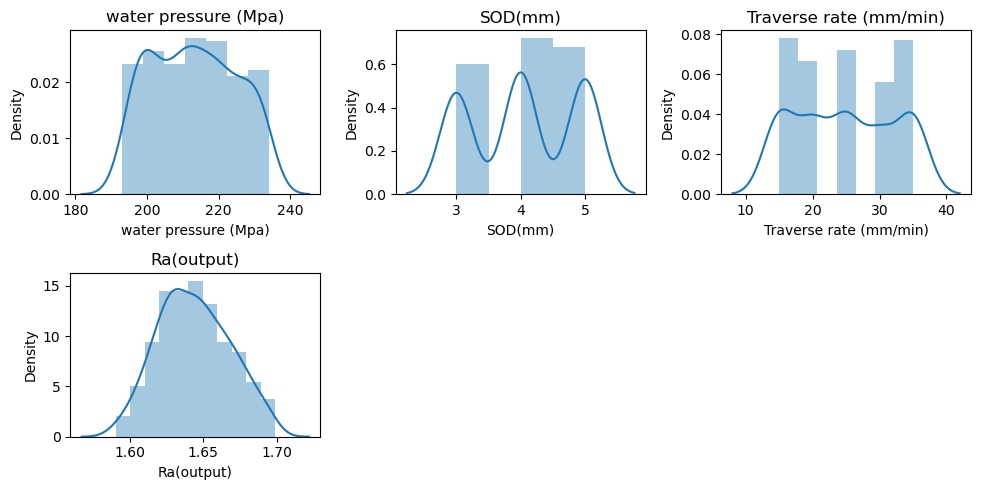

In [51]:
num_cols = df2.select_dtypes(exclude='object')
num = num_cols.columns

nrows= 2
ncol = 3
iterator = 1
for i in num:
    plt.subplot(nrows,ncol,iterator)
    sns.distplot(df2.loc[:,i],kde=True)
    iterator +=1
    plt.title(i)
plt.tight_layout()
plt.show()

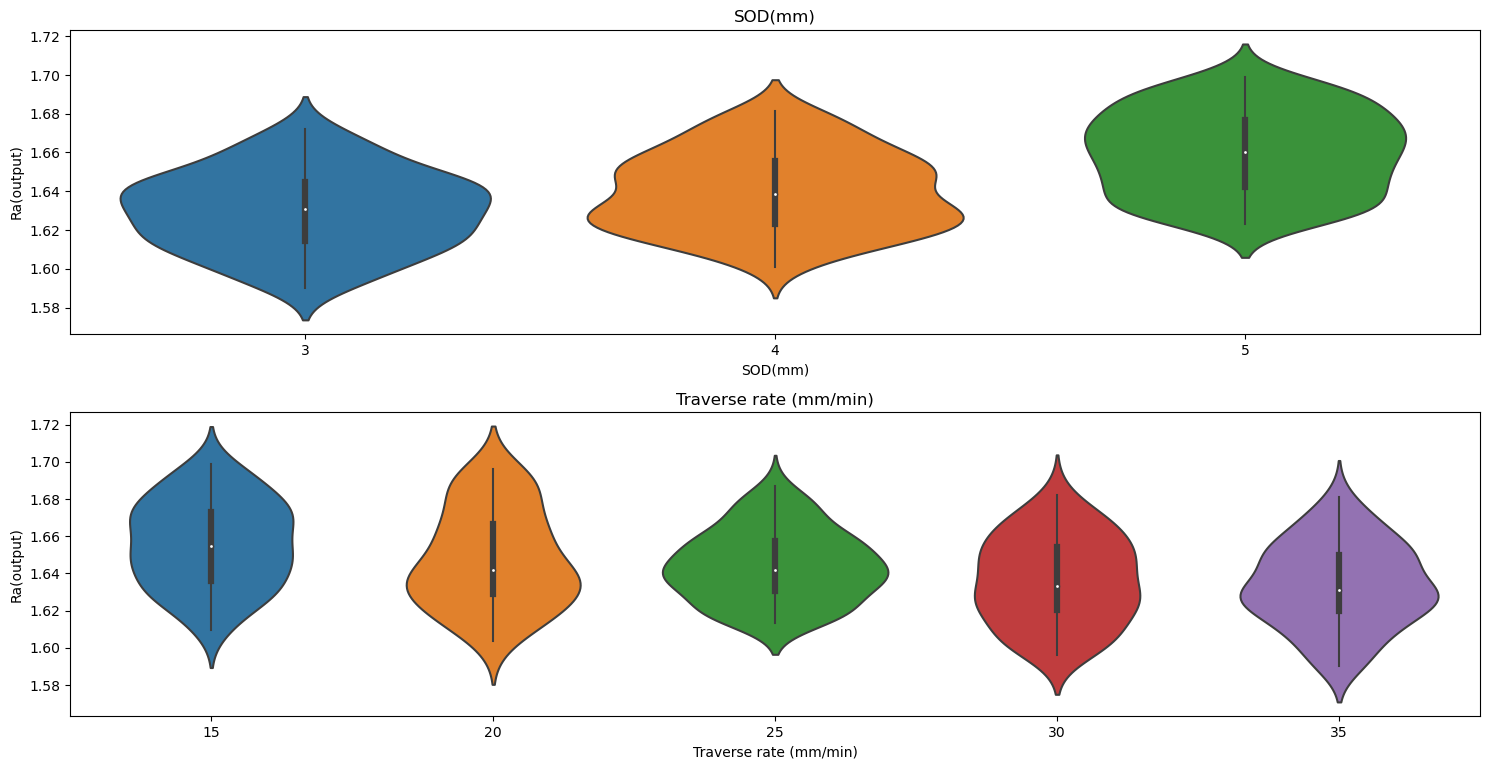

In [52]:
plt.rcParams["figure.figsize"]=[15,15]
cols = ['SOD(mm)', 'Traverse rate (mm/min)']
nrows= 4
ncol = 1
iterator = 1
for i in cols:
    plt.subplot(nrows,ncol,iterator)
    sns.violinplot(x=df2[i],y=df2['Ra(output)'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

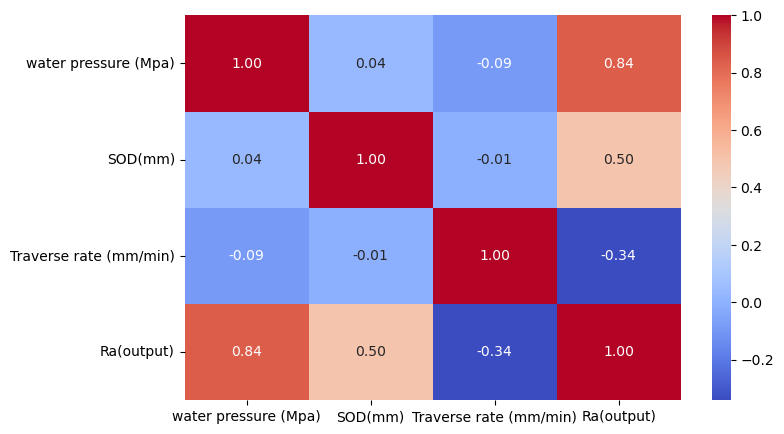

In [53]:
plt.rcParams["figure.figsize"]=[8,5]
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

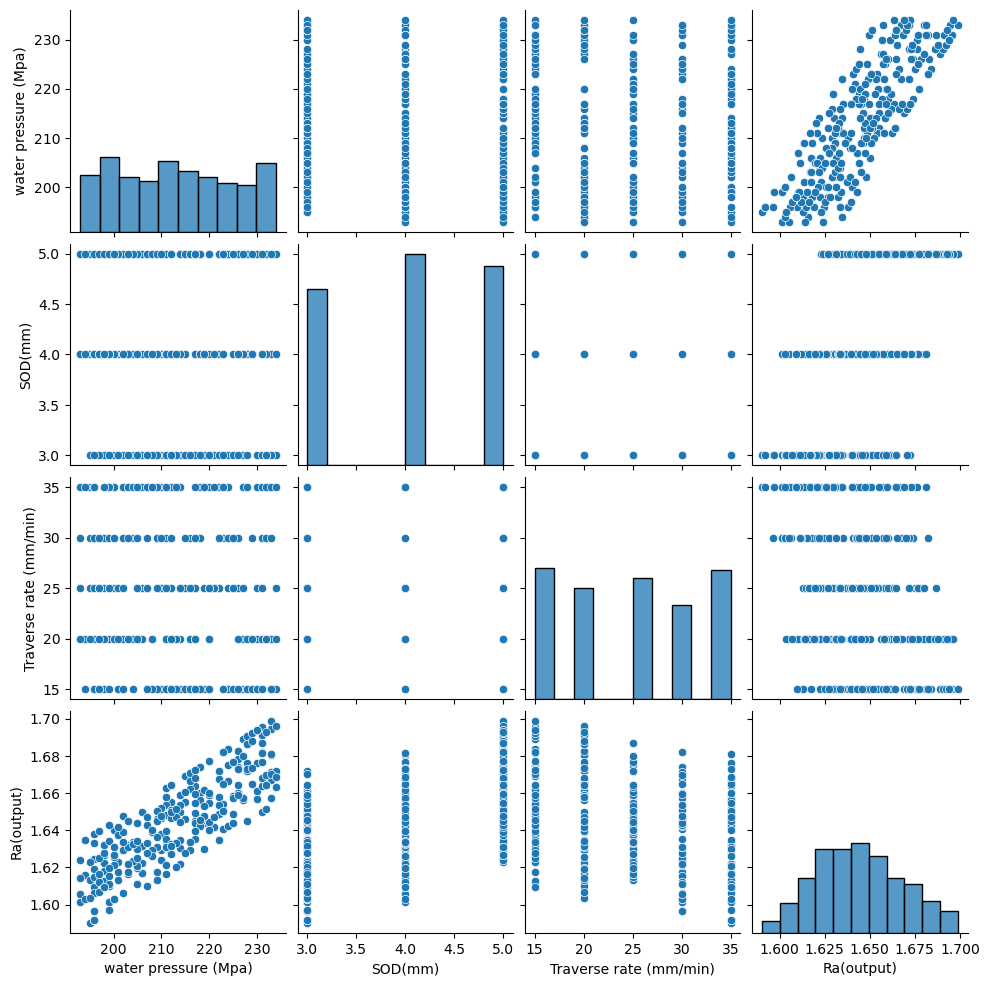

In [54]:
sns.pairplot(df2,palette="bright")
plt.show()

In [55]:
df3 = df2.copy(deep=True)

In [56]:
 # feature engineering
df3['Mean_Targ_SOD(mm)'] = df3.groupby('SOD(mm)')['Ra(output)'].transform('mean')

In [57]:
df3.skew()

water pressure (Mpa)      0.092264
SOD(mm)                  -0.072256
Traverse rate (mm/min)    0.057485
Ra(output)                0.148172
Mean_Targ_SOD(mm)         0.338068
dtype: float64

In [58]:
# from sklearn.preprocessing import PowerTransformer

In [59]:
# a1 = ['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)', 'Mean_Targ_Vol%','Mean_Targ_SOD(mm)']

In [60]:
# b=PowerTransformer(method='yeo-johnson')

# df3[a1] = b.fit_transform(df3[a1])

In [61]:
df3.skew()

water pressure (Mpa)      0.092264
SOD(mm)                  -0.072256
Traverse rate (mm/min)    0.057485
Ra(output)                0.148172
Mean_Targ_SOD(mm)         0.338068
dtype: float64

In [62]:
df3.columns

Index(['water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)',
       'Ra(output)', 'Mean_Targ_SOD(mm)'],
      dtype='object')

In [63]:
cols_1=[ 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)', 'Mean_Targ_SOD(mm)']

In [64]:
df3[["water pressure (Mpa)",'SOD(mm)', 'Traverse rate (mm/min)','Mean_Targ_SOD(mm)']] = ss.fit_transform(df3[["water pressure (Mpa)",'SOD(mm)', 'Traverse rate (mm/min)','Mean_Targ_SOD(mm)']])

In [65]:
x = df3.drop(columns=['Ra(output)'],axis=1)
y = df3['Ra(output)']

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(240, 4)
(60, 4)
(240,)
(60,)


In [67]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.feature_selection import RFE

In [68]:
# not using linear regression as data is created using linear regression
# the assumptions alos fails

In [69]:
temp_train = sma.add_constant(xtrain)
temp_test = sma.add_constant(xtest)

In [70]:
model1 = sma.OLS(ytrain,temp_train).fit()

In [71]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ra(output)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.267e+11
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:30:30   Log-Likelihood:                 3271.8
No. Observations:                 240   AIC:                            -6534.
Df Residuals:                     235   BIC:                            -6516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.6438    1.9e-08   8.66e+07      0.000       1.644       1.644
water pressure (Mpa)       0.0193   1.92e-08   1.01e+06      0.000       0.019       0.019
SOD(mm)                    0.0113   9.94e-08   1.14e+05      0.000       0.011       0.011
Traverse rate (mm/min)    -0.0064    1.9e-08  -3.36e+05      0.000      -0.006      -0.006
Mean_Targ_SOD(mm)       6.523e-08   9.98e-08      0.654      0.514   -1.31e-07    2.62e-07
==============================================================================
Omnibus:                      150.290   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.445
Skew:                           0.059   Prob(JB):                     0.000443
Kurtosis:                       1.763   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Linearity : That there should be a linear pattern between the predictors and target --> Statistical test : rainbow Test
ssa.linear_rainbow(model1)[1]

0.556665642811287

In [73]:
ssa.jarque_bera(model1.resid)[3]

1.7628843715768971

In [74]:
durbin_watson(model1.resid)

1.9548099320560457

In [75]:
ssa.het_breuschpagan(model1.resid,model1.model.exog)[3]   # 

0.6944624886830424

In [76]:
# so we reject all the parametric models for model bilding because the data is upsampled using linear regression 

In [77]:
df5 = df2.copy(deep=True)

In [78]:
df5[["water pressure (Mpa)",'SOD(mm)', 'Traverse rate (mm/min)']] = ss.fit_transform(df5[["water pressure (Mpa)",'SOD(mm)', 'Traverse rate (mm/min)']])
x = df5.drop(columns=['Ra(output)'],axis=1)
y = df5['Ra(output)']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(240, 3)
(60, 3)
(240,)
(60,)


### Buliding Models

In [79]:
dt   = DecisionTreeRegressor(random_state=10)
rf   = RandomForestRegressor(random_state=10)
knn  = KNeighborsRegressor()
Ada  = AdaBoostRegressor(random_state=10)
xgb  = XGBRegressor(random_state=10)

In [80]:
l1 = [dt,rf,knn,Ada,xgb]

In [81]:
def models(mod, xtrain, ytrain, xtest, ytest):
    l = [str(mod).split('(')[0]]
    model1 = mod.fit(xtrain, ytrain)
    ypred_train = model1.predict(xtrain)
    ypred = model1.predict(xtest)
    
    l.append(model1.score(xtrain, ytrain))  # Training accuracy
    l.append(model1.score(xtest, ytest))    # Testing accuracy
    
    l.append(round(r2_score(ytest, ypred),3))
    l.append(round(np.sqrt(mean_squared_error(ytrain, ypred_train)), 5))
    l.append(round(np.sqrt(mean_squared_error(ytest, ypred)), 5))  # rmse test
    
    return l

In [82]:
best = pd.DataFrame(columns = ['Model','Train_ACC','Test_ACC','r2_score','RMSE_train','RMSE_test'])

In [83]:
perf1 = models(dt,xtrain,ytrain,xtest,ytest)
perf2 = models(rf,xtrain,ytrain,xtest,ytest)
perf3 = models(knn,xtrain,ytrain,xtest,ytest)
perf4 = models(Ada,xtrain,ytrain,xtest,ytest)
perf5 = models(xgb,xtrain,ytrain,xtest,ytest)

In [84]:
best.loc[len(best)] = perf1
best.loc[len(best)] = perf2
best.loc[len(best)] = perf3
best.loc[len(best)] = perf4
best.loc[len(best)] = perf5

In [85]:
best

,Model,Train_ACC,Test_ACC,r2_score,RMSE_train,RMSE_test
0,DecisionTreeRegressor,1.000000,0.974198,0.974,0.00000,0.00343
1,RandomForestRegressor,0.998751,0.990842,0.991,0.00088,0.00204
2,KNeighborsRegressor,0.988158,0.976396,0.976,0.00270,0.00328
3,AdaBoostRegressor,0.952680,0.944320,0.944,0.00539,0.00503
4,XGBRegressor,0.999128,0.991488,0.991,0.00073,0.00197


In [86]:
# Ada boost is best model 
# doing hyper parameter tuning 

In [87]:
AdaBoostRegressor()

AdaBoostRegressor()

In [88]:
# hyper
# params = {'n_estimators':[100,150,200],
#          'learning_rate':[1.0,0.8,1.5,2]}

# Grid  = GridSearchCV(estimator=Ada,cv=5,param_grid=params,n_jobs=-1)

# Grid.fit(xtrain,ytrain)

# Grid.best_params_

In [103]:
ada   = AdaBoostRegressor(n_estimators=150,random_state=10,learning_rate=1)
m1 = ada.fit(xtrain, ytrain)
ypred_train = m1.predict(xtrain)
ypred = m1.predict(xtest)

print(m1.score(xtrain, ytrain))  # Training accuracy
print(m1.score(xtest, ytest))    # Testing aprint
print(round(r2_score(ytest, ypred),3))
print(round(np.sqrt(mean_squared_error(ytrain, ypred_train)), 5))
print(round(np.sqrt(mean_squared_error(ytest, ypred)), 5))  # rmse test

0.9565423780457166
0.9380271980470662
0.938
0.00496
0.00633


In [104]:
min(ypred)

1.6061165925925924

In [105]:
feature_importances = m1.feature_importances_

In [106]:
feature_importances

array([0.74946497, 0.18856898, 0.06196606])

In [107]:
column_names = [ 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)']

importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})

importance_df.sort_values(by='Importance', ascending=False, inplace=True)

importance_df

,Feature,Importance
0,water pressure (Mpa),0.749465
1,SOD(mm),0.188569
2,Traverse rate (mm/min),0.061966


In [108]:
# Assuming you have the feature importances and the original DataFrame
column_names = ['water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)']

# Create a DataFrame to store the feature importances along with their corresponding column names
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Get the best value for each feature
best_values = {}

for feature_name in importance_df['Feature']:
    best_values[feature_name] = df5[feature_name].max()

print("Best values for each feature:")
for feature, value in best_values.items():
    print(f"{feature}: {value}")


Best values for each feature:
water pressure (Mpa): 1.7824250463517048
SOD(mm): 1.2015028183722214
Traverse rate (mm/min): 1.3981327305890503


In [109]:
df5[(df5['water pressure (Mpa)']==1.7231438996283654)|(df5['SOD(mm)']==1.2655243193355703)&(df5['Traverse rate (mm/min)']==1.767862923981746) ]

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)


In [110]:
df2.iloc[[15,27,49,53,77]]

,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
15,208,4,35,1.625866
27,206,4,25,1.631343
49,216,3,30,1.629290
53,200,5,20,1.639997
77,193,4,35,1.601111


In [111]:
def preprocess(df2):
    X=df2.drop('Ra(output)',1)
    y=df2['Ra(output)']
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=42)
    return xtrain,xtest,ytrain,ytest

In [112]:
# Creatig a pipline object for deployment
from sklearn.pipeline import Pipeline

steps = [('scaler',ss),('RFC tuned',Ada)]
pipeline = Pipeline(steps)
xtrain,xtest,ytrain,ytest = preprocess(df2)
pipeline.fit(xtrain,ytrain)
ypred = pipeline.predict(xtest)

print(pipeline.score(xtrain, ytrain))  # Training accuracy
print(pipeline.score(xtest, ytest))    # Testing aprint
print(round(r2_score(ytest, ypred),3))
#print(round(np.sqrt(mean_squared_error(ytrain, ypred_train)), 5))
print(round(np.sqrt(mean_squared_error(ytest, ypred)), 5))  # rmse test

0.9512556210270755
0.93261885639145
0.933
0.0066


In [113]:
import pickle
model=open('rf.pickle','wb')
pickle.dump(pipeline,model)
model.close()

In [114]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.title('Water_ Jet')

# Step 1: Load the Model
model = open('rf.pickle', 'rb')
pipeline = pickle.load(model)
model.close()

# Step 2: Create a UI for the front-end user
water_pressure = st.number_input('water pressure (Mpa)', min_value=193, max_value=234)
SOD = st.number_input('SOD(mm)', min_value=3, max_value=7)
Traverse_rate = st.number_input('Traverse rate (mm/min)', min_value=15, max_value=35)

# Step 3: Change User Input to Model Input data
data = {'water_pressure': [water_pressure], 'SOD': [SOD], 'Traverse_rate': [Traverse_rate]}
input_data = pd.DataFrame(data)

# Step 4: Get Predictions and Print the result
if st.button('Predict'):
    result = pipeline.predict(input_data)
    st.table(input_data)
    st.success(str(result[0]))

Overwriting app.py


In [101]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)

In [109]:
streamlit run your_script.py

SyntaxError: invalid syntax (4054717884.py, line 1)

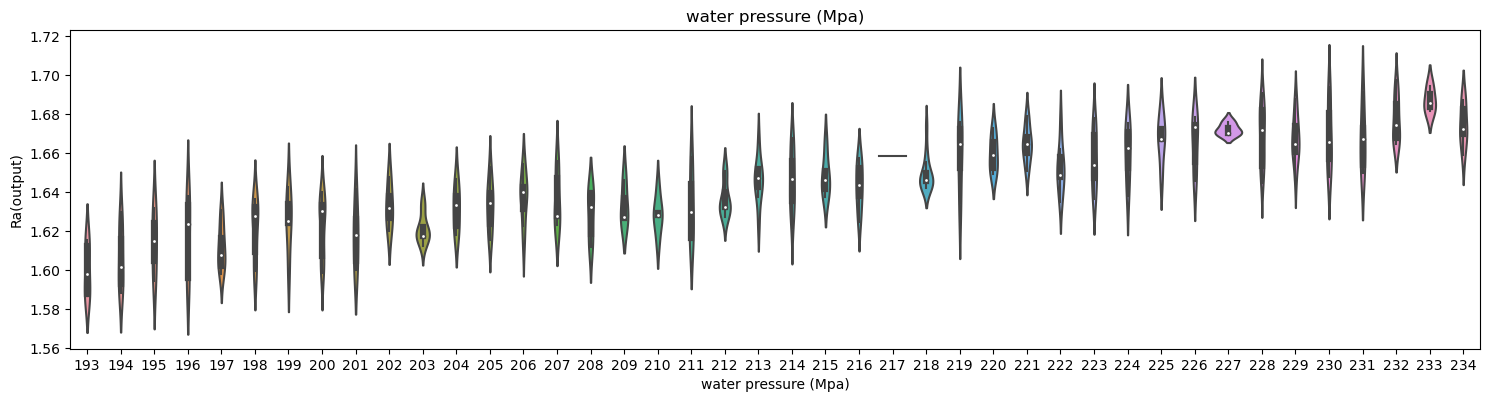

In [103]:
plt.rcParams["figure.figsize"]=[15,15]
cols = ['water pressure (Mpa)']
nrows= 4
ncol = 1
iterator = 1
for i in cols:
    plt.subplot(nrows,ncol,iterator)
    sns.violinplot(x=df2[i],y=df2['Ra(output)'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()